Проверка выполнения условий гидростатики и термобаланса.

Date of creation: 14.07.2020

Last updated: 14.07.2020

In [115]:
import math
import numpy as np
import pandas as pd

%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

In [116]:
import NotebookLoader
import Physics as ph
import SSM18 as s

In [117]:
pi = math.pi
Z = s.Z

In [122]:
def load_model(epoch):
    filename = 'Mass/3epoch%.02d.csv' % epoch
    return pd.read_csv(filename)

In [123]:
epoch = 0
df1 = load_model(epoch)
dimM = len(df1.index)
df1

,Unnamed: 0,Mass,Radius,Temperature,Density,Luminosity,Hydrogen,Opacity,Convection,Pressure,Velocity
0,0,0.000000e+00,0.000000e+00,1.451000e+07,90.073858,0.000000e+00,0.732,1.445415,1.0,1.794120e+17,1.208753e-10
1,1,1.990588e+30,1.744864e+09,1.439966e+07,89.041127,3.337100e+31,0.732,1.461410,0.0,1.760063e+17,1.149243e-10
2,2,3.981176e+30,2.201408e+09,1.433513e+07,88.430509,6.557975e+31,0.732,1.470834,0.0,1.740159e+17,1.115997e-10
3,3,5.971765e+30,2.522902e+09,1.428116e+07,87.917179,9.694220e+31,0.732,1.478767,0.0,1.723544e+17,1.089033e-10
4,4,7.962353e+30,2.779701e+09,1.423310e+07,87.458197,1.275919e+32,0.732,1.485871,0.0,1.708776e+17,1.065640e-10
...,...,...,...,...,...,...,...,...,...,...,...
996,996,1.982626e+33,4.139110e+10,9.072824e+05,0.203440,3.562824e+33,0.732,1.486150,0.0,2.533749e+13,1.087433e-21
997,997,1.984616e+33,4.188541e+10,8.016714e+05,0.166783,3.562824e+33,0.732,1.191579,0.0,1.835411e+13,2.401102e-22
998,998,1.986607e+33,4.249698e+10,6.818832e+05,0.125189,3.562824e+33,0.732,0.907523,0.0,1.171825e+13,3.241820e-23
999,999,1.988598e+33,4.336443e+10,5.328578e+05,0.075302,3.562824e+33,0.732,0.639191,0.0,5.508131e+12,1.428180e-24


In [124]:
x = df1['Hydrogen'].values
m = df1['Mass'].values
d = df1['Density'].values
t = df1['Temperature'].values
r = df1['Radius'].values
l = df1['Luminosity'].values
p = df1['Pressure'].values
k = df1['Opacity'].values
c = df1['Convection'].values
v = df1['Velocity'].values

In [125]:
e = np.zeros(dimM) # энерговыделения
a = np.zeros(dimM) # градиент давления
da = np.zeros(dimM) # несоответствие градиента давления
b = np.zeros(dimM) # градиент температуры
br = np.zeros(dimM) # градиент температуры при радиации
bc = np.zeros(dimM) # градиент температуры при конвекции
db = np.zeros(dimM) # несоответствие градиента температуры 

Условие гидростатики

In [126]:
for i in range(1, dimM-1):
    mu = ph.MU(x[i], 1 - x[i] -Z, Z)
    a[i] = -ph.G*m[i]*d[i]/pow(r[i], 2)
    da[i] = (p[i+1] - p[i])/2/(r[i+1] - r[i]) + (p[i] - p[i-1])/2/(r[i] - r[i-1]) #- a[i]
#     da[i] = (p[i+1] - p[i])/(r[i+1] - r[i])
#     print(i, a[i], da[i], pow((a[i] - da[i])/a[i], 2))

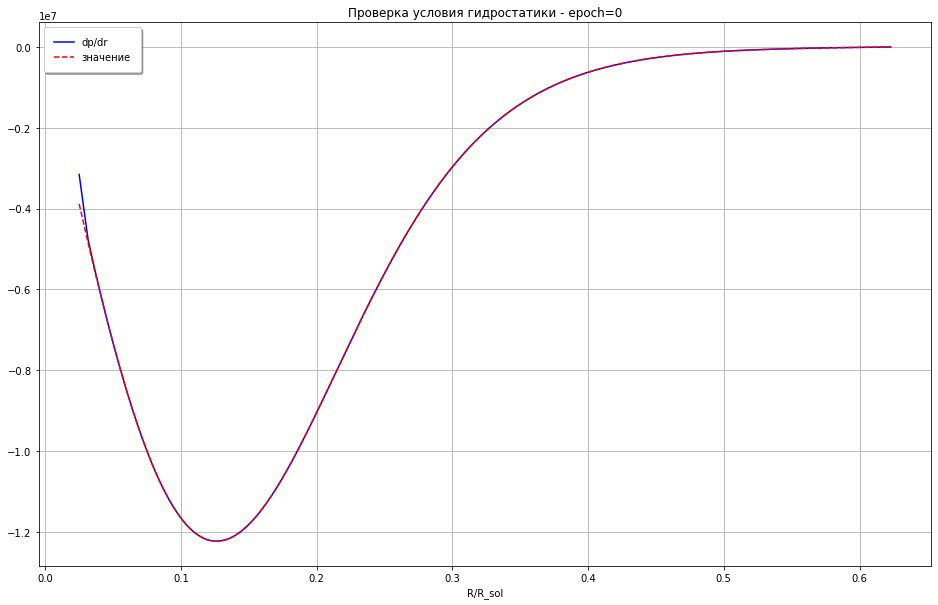

In [129]:
r1 = r[1:-1]/s.R
m1 = m[1:-1]/s.M
a1 = a[1:-1]
da1 = da[1:-1]
plt.figure(figsize=(16, 10))
ax = plt.axes()
plt.plot(r1, da1, '-', color='blue', label='dp/dr')
plt.plot(r1, a1, '--', color='red', label='значение')
# plt.xlim(0.9,1.01)
# plt.xlim(0.,0.1)
# plt.ylim(-0.1, 0.1)
plt.xlabel('R/R_sol')
plt.ylabel('')
plt.title('Проверка условия гидростатики - epoch=%d' % epoch)
ax.grid(b=True, which='both')
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1);

Условие переноса энергии

In [130]:
for i in range(1, dimM-1):
    br[i] = -3/16*k[i]*d[i]*l[i]/ph.sigma/pow(t[i], 3)/4/pi/pow(r[i], 2)
    mu = ph.MU(x[i], 1 - x[i] -Z, Z)
    bc[i] = -0.4*mu/ph.kB*ph.m_prot*ph.G*m[i]/pow(r[i], 2)
    if abs(br[i]) < abs(bc[i]):
        b[i] = br[i]
    else:
        b[i] = bc[i]
    db[i] = (t[i+1] - t[i])/2/(r[i+1] - r[i]) + (t[i] - t[i-1])/2/(r[i] - r[i-1]) # - b[i]
#         db[i] = (t[i] - t[i-1])/(r[i] - r[i-1])
#     print(i, b[i], db[i], pow((b[i] - db[i])/b[i], 2))

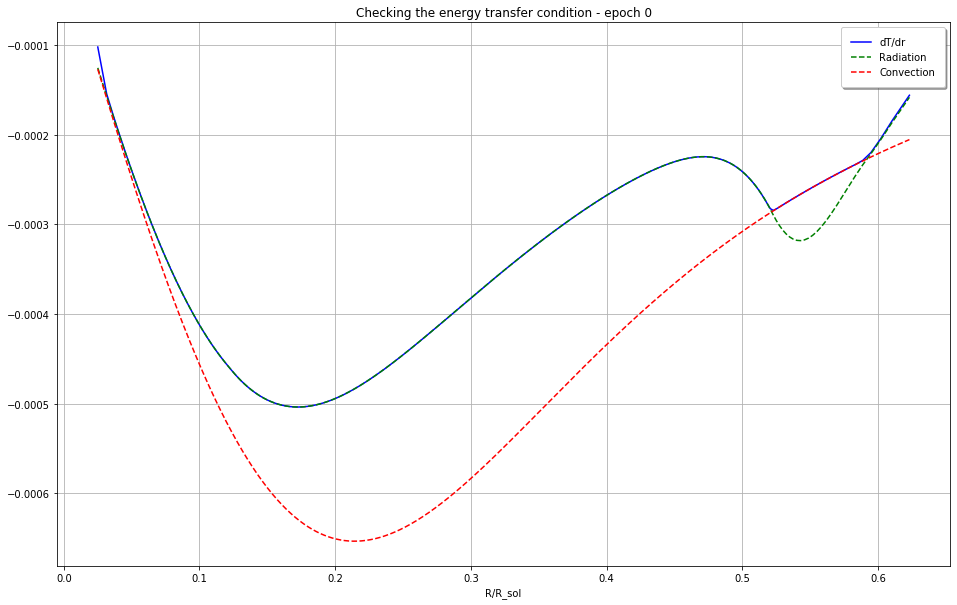

In [131]:
m1 = m[1:-1]/s.M
r1 = r[1:-1]/s.R
b1 = br[1:-1]
b2 = bc[1:-1]
db1 = db[1:-1]
plt.figure(figsize=(16, 10))
ax = plt.axes()
plt.plot(r1, db1, '-', color='blue', label='dT/dr')
plt.plot(r1, b1, '--', color='green', label='Radiation')
plt.plot(r1, b2, '--', color='red', label='Convection')
# plt.xlim(0.,.1)
# plt.xlim(0.9,1.01)
# plt.ylim(-0.1, 0.1)
plt.xlabel('R/R_sol')
plt.ylabel('')
plt.title('Checking the energy transfer condition - epoch %d' % epoch)
ax.grid(b=True, which='both')
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1);

In [133]:
sa = 0
sb = 0
for i in range(1, dimM-1):
    sa += pow((da[i] - a[i]), 2)
    sb += pow((db[i] - b[i]), 2)
pow(sa, 0.5), pow(sb, 0.5)    

(738749.3300151163, 2.369534898793534e-05)

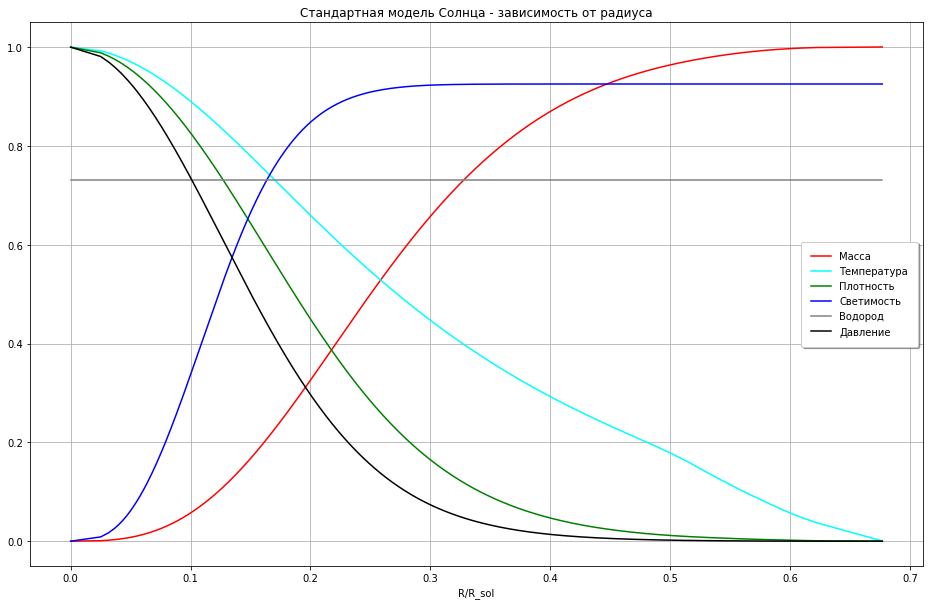

In [137]:
r1 = r/s.R
plt.figure(figsize=(16, 10))
ax = plt.axes()
plt.plot(r1, m/s.M, color='red', label='Масса')
plt.plot(r1, t/t[0], color='cyan', label='Температура')
plt.plot(r1, d/d[0], '-', color='green', label='Плотность')
plt.plot(r1, l/s.L, color='blue', label='Светимость')
plt.plot(r1, x, color='gray', label='Водород')
plt.plot(r1, p/p[0], color='black', label='Давление')
# plt.xlim(-0.1,0.1)
# plt.ylim(-0.1, 0.1)
plt.xlabel('R/R_sol')
plt.ylabel('')
plt.title('Стандартная модель Солнца - зависимость от радиуса')
ax.grid(b=True, which='both')

ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1);

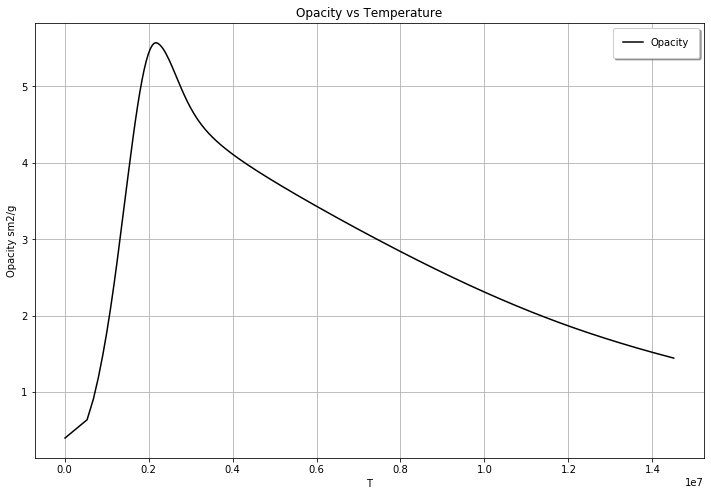

In [138]:
plt.figure(figsize=(12, 8))
ax = plt.axes()
plt.plot(t, k, color='black', label='Opacity')
#plt.xlim(6, 7.25)
#plt.ylim(0, 20)
plt.xlabel('T')
plt.ylabel('Opacity sm2/g')
plt.title('Opacity vs Temperature')
ax.grid(b=True, which='both')
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1);